# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('previsao_de_renda.csv')

df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [13]:
df['data_ref'] = pd.to_datetime(df['data_ref'], errors='coerce')

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [15]:
print(df.select_dtypes(exclude=['datetime', 'number']).columns)
print(df.select_dtypes(include=['object', 'boolean']).columns)

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'mau'],
      dtype='object')
Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'mau'],
      dtype='object')


In [17]:
qualitativas = df.select_dtypes(include=['object', 'boolean']).columns

print(df[qualitativas].info())
df[qualitativas]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sexo              15000 non-null  object
 1   posse_de_veiculo  15000 non-null  bool  
 2   posse_de_imovel   15000 non-null  bool  
 3   tipo_renda        15000 non-null  object
 4   educacao          15000 non-null  object
 5   estado_civil      15000 non-null  object
 6   tipo_residencia   15000 non-null  object
 7   mau               15000 non-null  bool  
dtypes: bool(3), object(5)
memory usage: 630.0+ KB
None


,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,mau
0,F,False,True,Assalariado,Secundário,Casado,Casa,False
1,M,True,True,Empresário,Secundário,Casado,Casa,False
2,M,True,True,Assalariado,Superior completo,Casado,Casa,False
3,F,True,False,Empresário,Secundário,Casado,Casa,False
4,M,False,False,Assalariado,Secundário,Casado,Casa,False
...,...,...,...,...,...,...,...,...
14995,M,True,True,Assalariado,Secundário,Casado,Casa,False
14996,M,True,True,Servidor público,Superior completo,Casado,Estúdio,False
14997,F,True,True,Assalariado,Secundário,Casado,Casa,False
14998,F,False,True,Servidor público,Superior completo,Casado,Casa,False


C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3857569083.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=tick_labels, rotation=45)


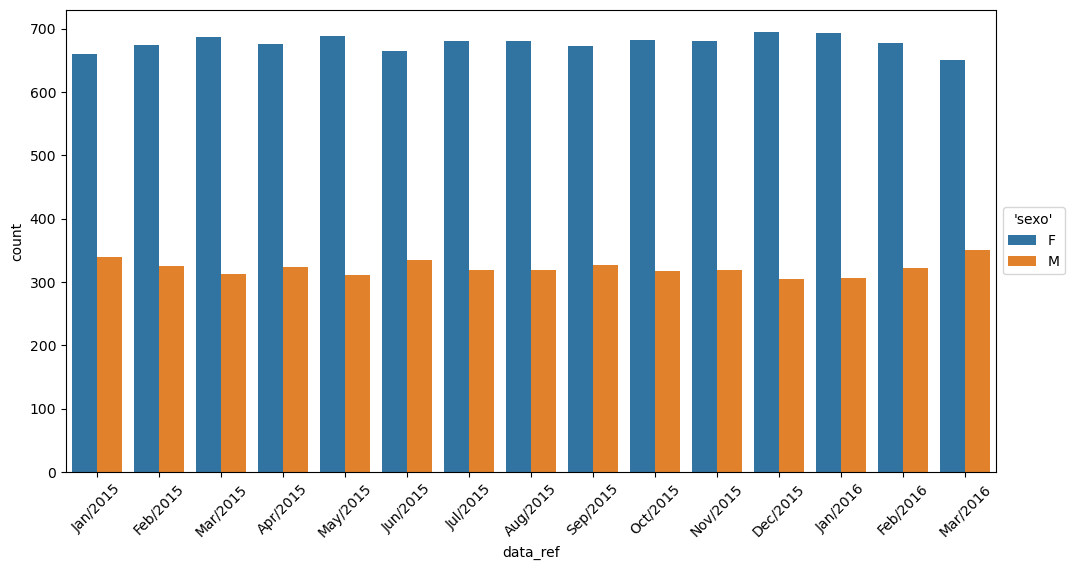

C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3857569083.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=tick_labels, rotation=45)


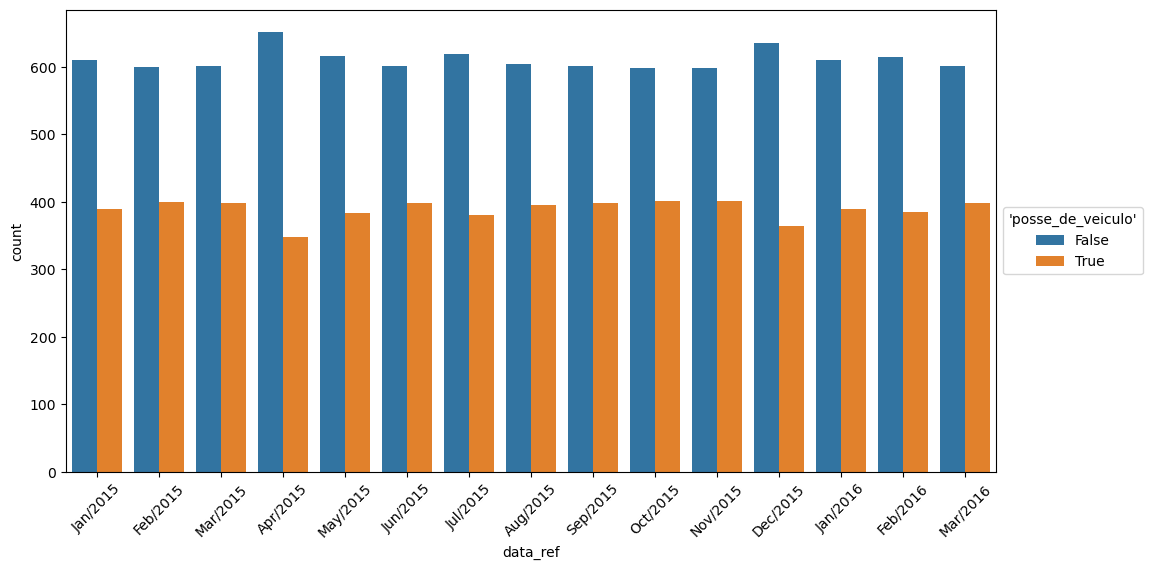

C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3857569083.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=tick_labels, rotation=45)


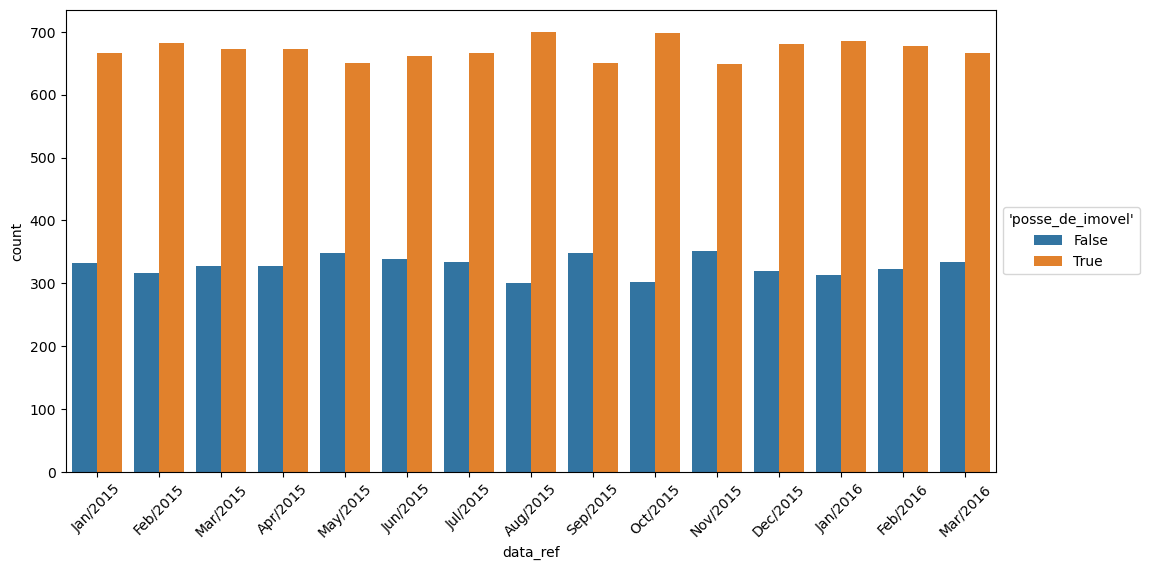

C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3857569083.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=tick_labels, rotation=45)


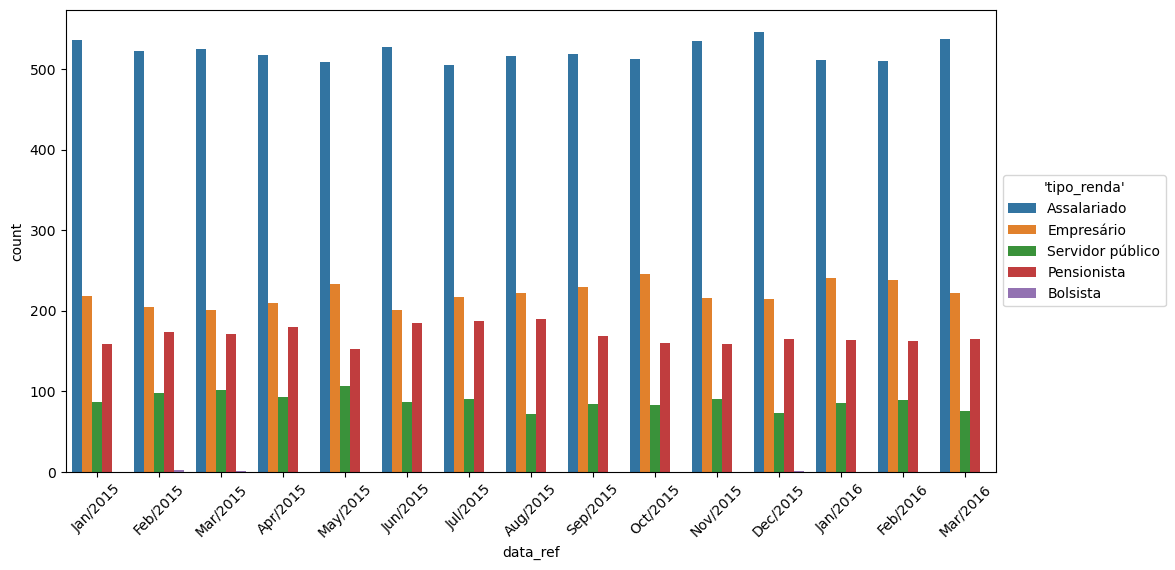

C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3857569083.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=tick_labels, rotation=45)


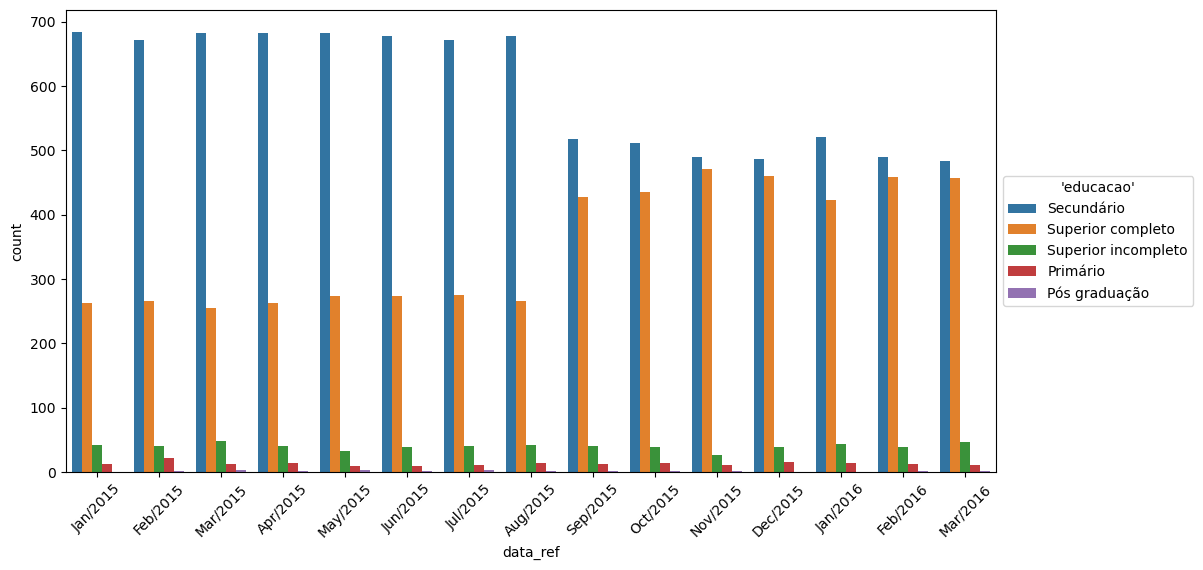

C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3857569083.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=tick_labels, rotation=45)


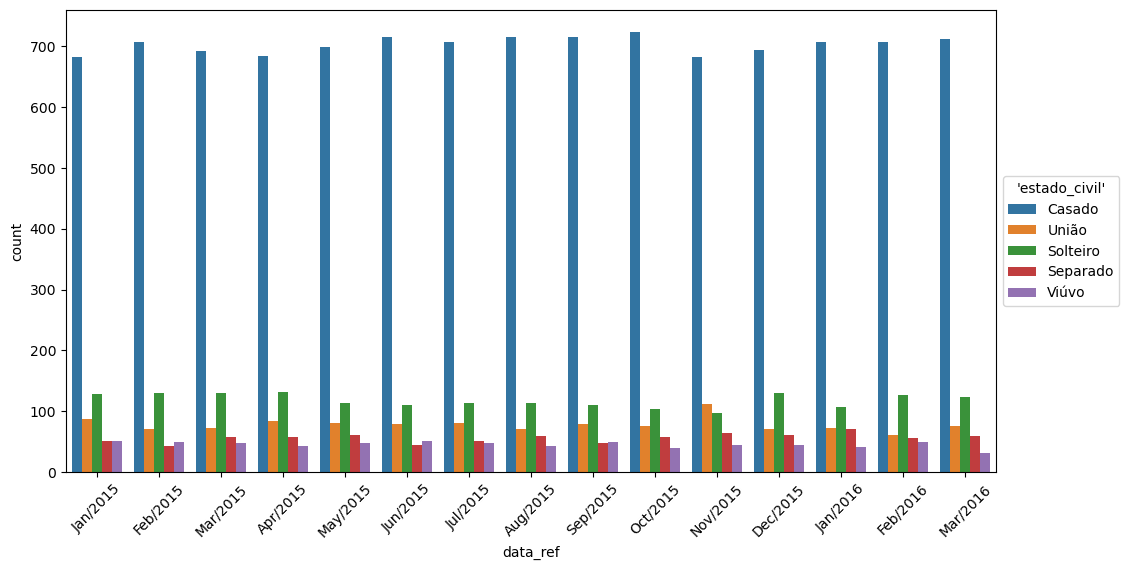

C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3857569083.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=tick_labels, rotation=45)


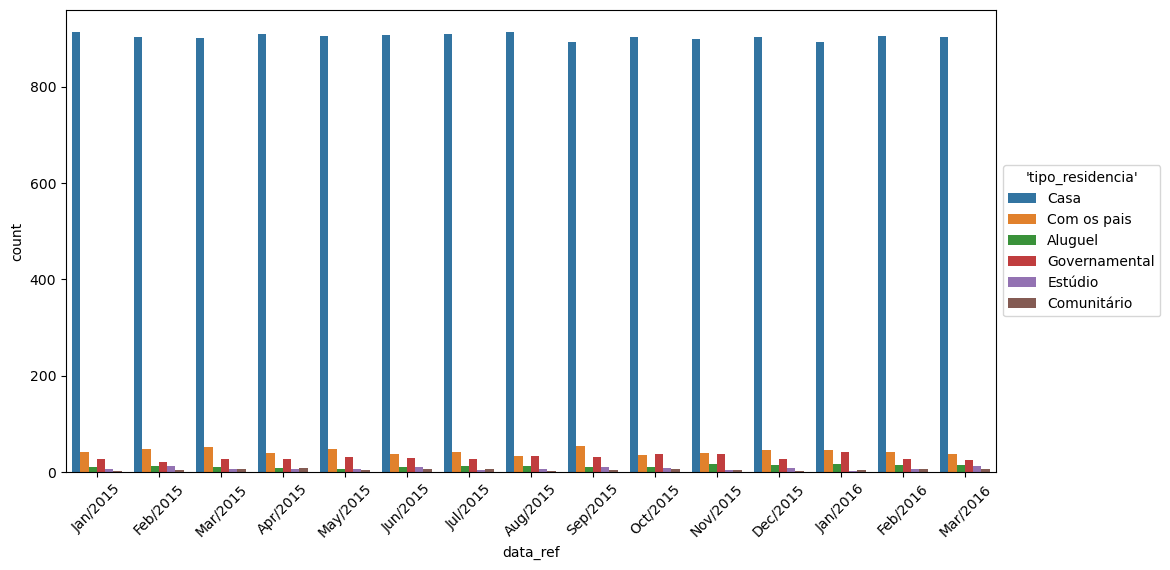

C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3857569083.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=tick_labels, rotation=45)


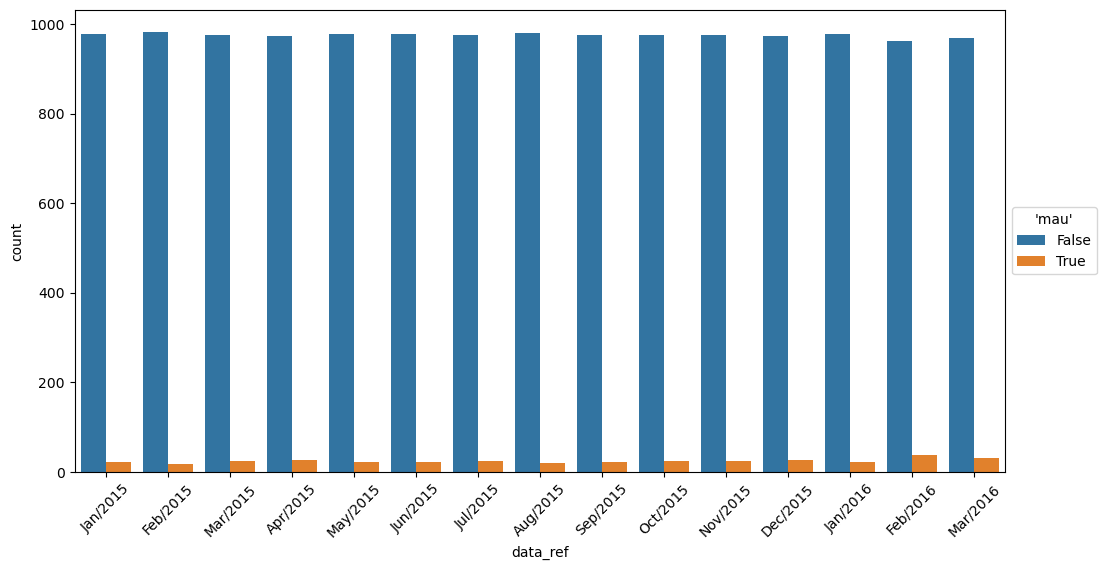

In [39]:
plt.rc('figure', figsize=(12,6))

for col in qualitativas:
    ax = sns.countplot(x='data_ref', hue=col, data=df)
    tick_labels = df['data_ref'].map(lambda x: x.strftime('%b/%Y') if pd.notnull(x) else 'N/A').unique()

    ax.set_xticklabels(labels=tick_labels, rotation=45)
    ax.legend(bbox_to_anchor=(1,.5), loc=6, title=f"'{col}'")

    plt.show()

Observando os gráficos, o que teve uma mudança significativa com relação aos demais, foi o "educação" onde a partir de Set/2015 houve um aumento dos dados de ensino superior completo e diminuição nos dados de ensino secundário, alterando a dinâmica do gráfico nos meses sequentes.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3625273874.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])
C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3625273874.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


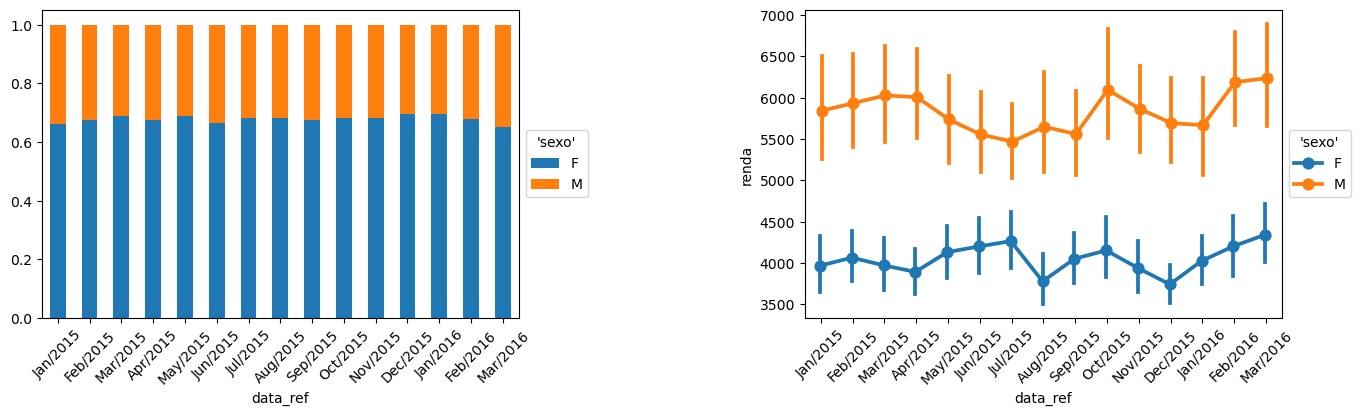

C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3625273874.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])
C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3625273874.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


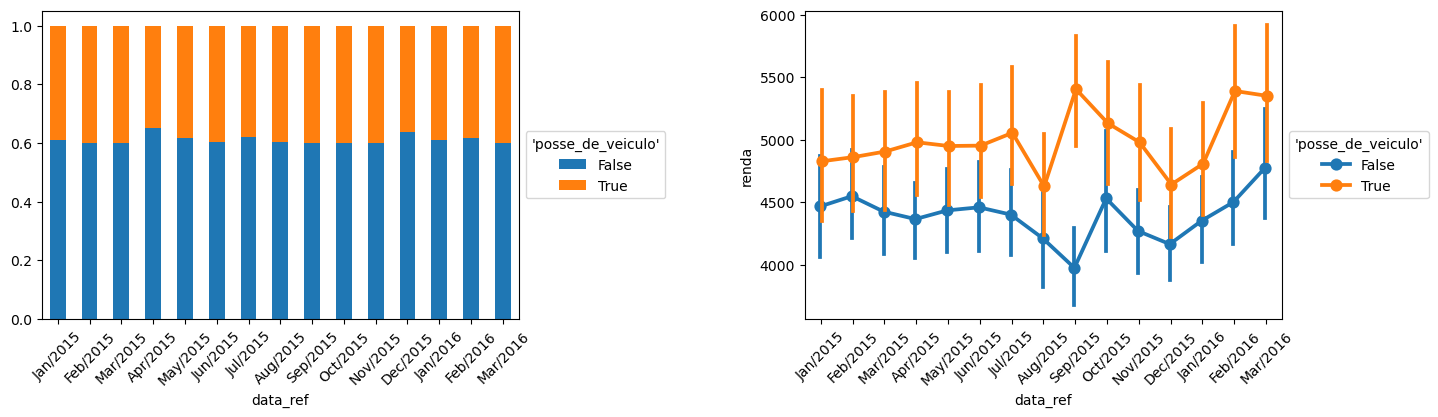

C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3625273874.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])
C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3625273874.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


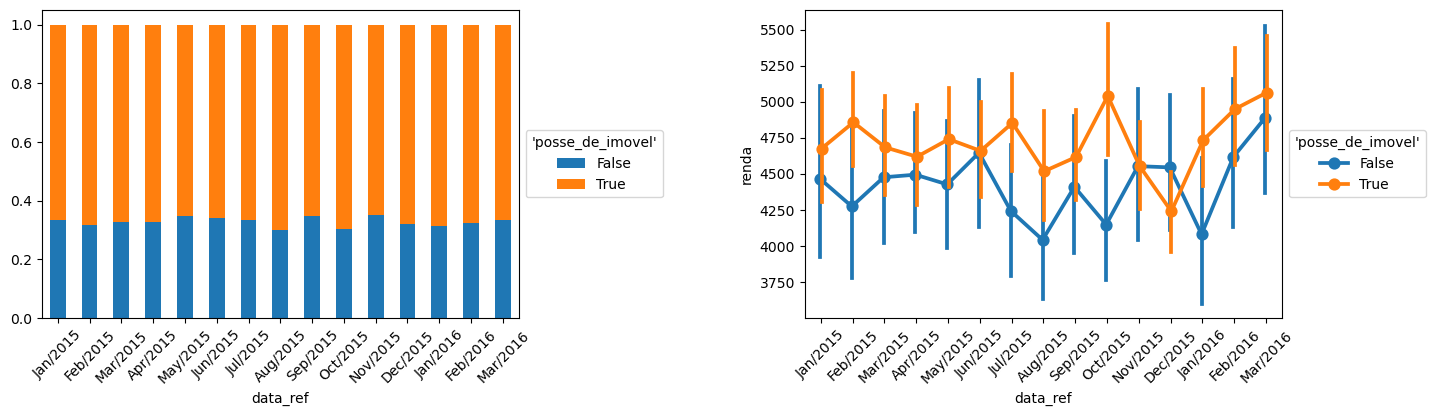

C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3625273874.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])
C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3625273874.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


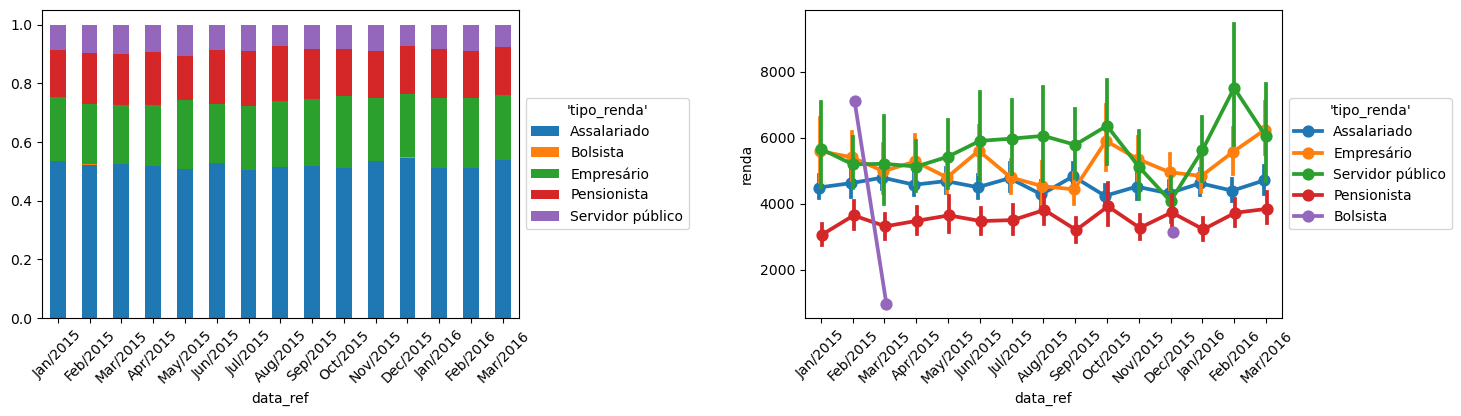

C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3625273874.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])
C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3625273874.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


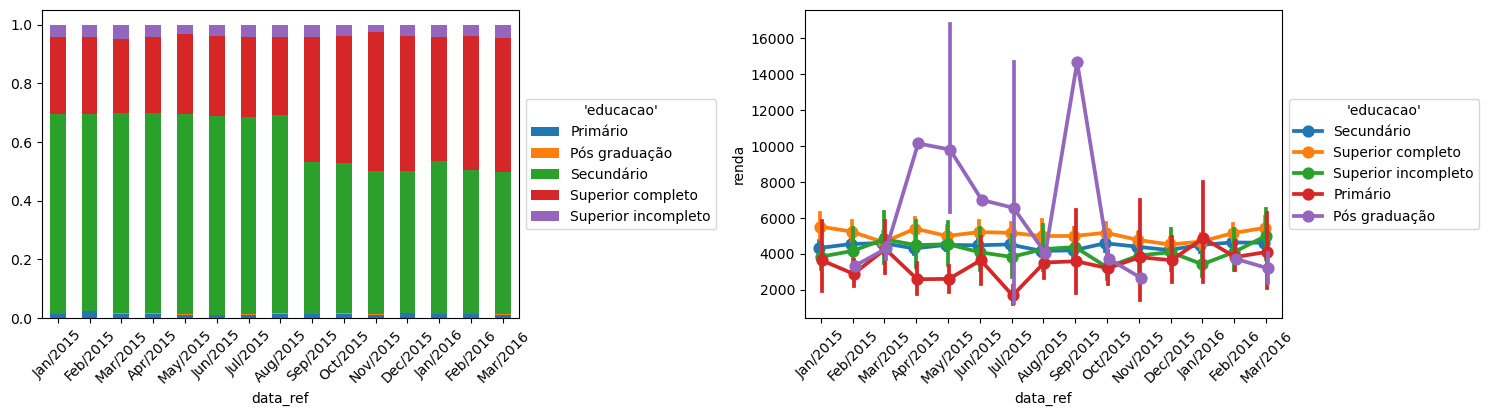

C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3625273874.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])
C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3625273874.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


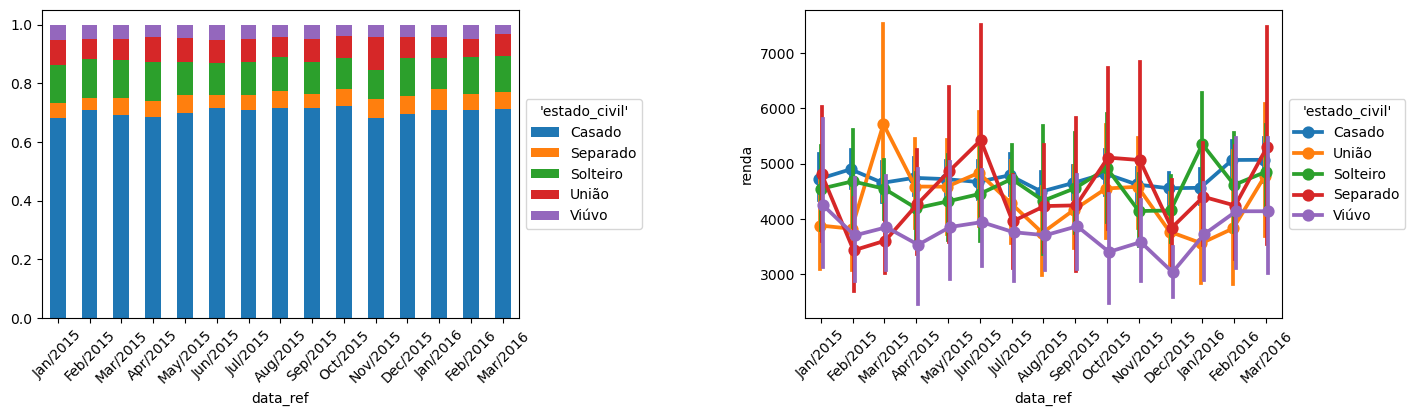

C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3625273874.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])
C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3625273874.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


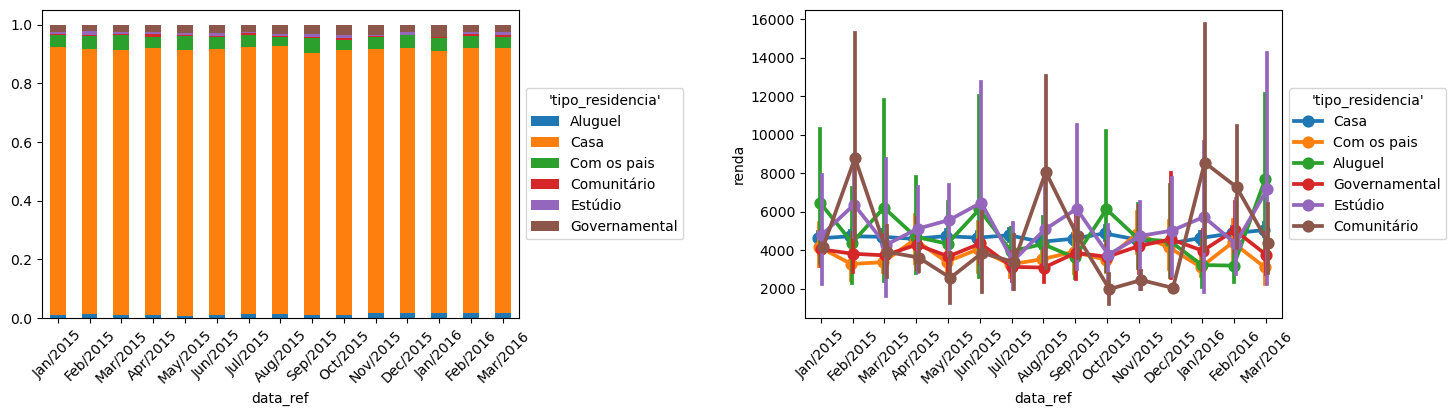

C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3625273874.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])
C:\Users\santo\AppData\Local\Temp\ipykernel_10308\3625273874.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


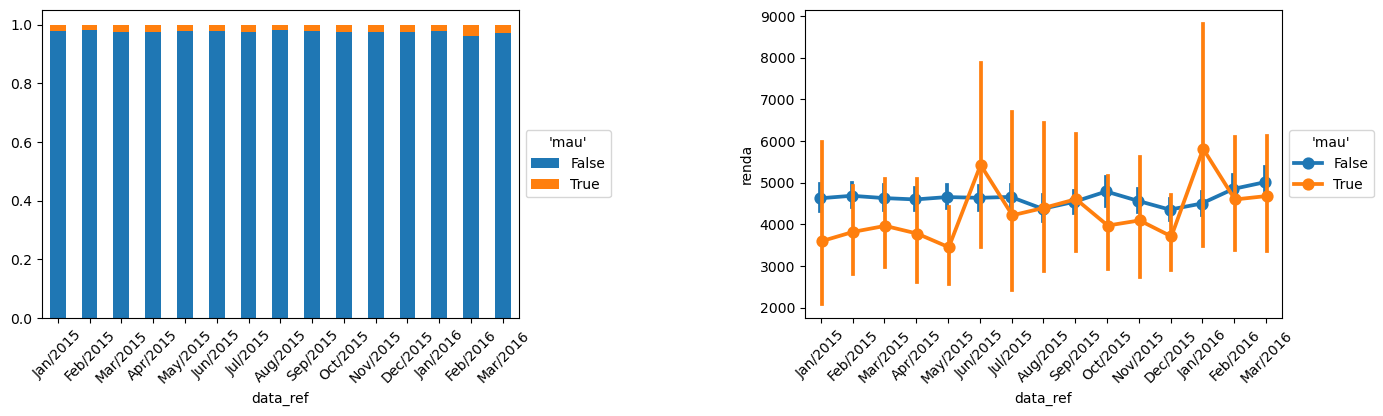

In [43]:
plt.rc('figure', figsize=(16,4))

for col in qualitativas:
    fig, axes = plt.subplots(1,2)
    fig.subplots_adjust(wspace=.6)
    
    tick_labels = df['data_ref'].map(lambda x: x.strftime('%b/%Y')).unique()
    
    # barras empilhadas:
    df_crosstab = pd.crosstab(index=df['data_ref'], 
                              columns=df[col], 
                              normalize='index')
    ax0 = df_crosstab.plot.bar(stacked=True, ax=axes[0])
    ax0.set_xticklabels(labels=tick_labels, rotation=45)
    axes[0].legend(bbox_to_anchor=(1,.5), loc=6, title=f"'{col}'")

    # perfis médios no tempo:
    ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])
    ax1.set_xticklabels(labels=tick_labels, rotation=45)
    axes[1].legend(bbox_to_anchor=(1,.5), loc=6, title=f"'{col}'")

    plt.show()

O gráfico "educação" foi o que teve maior alteração ao longo do tempo, os demais gráficos seguem padrões, com alguns momentos, como, por exemplo, o gráfico "mau" tendo alguns picos como true em determinados meses, que aparentemente são o meio e o inicio do ano. Com base nisso, acredito pode-se usar sim as variáveis para modelagem.